<a href="https://colab.research.google.com/github/Rkinbag/stocck-market-prediction/blob/main/DT%20%2CRDT%20%2C%20XGboost_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
apple_stock = pd.read_csv('apple_stock_prepared.csv')
apple_stock.head()

,volume,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12,event,close
0,-0.464011,-0.767950,-0.747017,-0.739101,-0.639217,-0.669514,-0.646494,0.627785,-1.812133,4.368171,-1.830292,7.716514,-1.862736,8.506598,-1.880503,-0.456953,2.338571
1,-0.190969,-0.769480,-0.758587,-0.738967,-0.732728,-0.632766,-0.662760,-0.579982,-1.183392,1.505926,-1.592107,3.501353,-1.710687,5.255354,-1.767605,-0.456953,2.945714
2,-0.723175,-0.760056,-0.760125,-0.750631,-0.732592,-0.727153,-0.625758,-0.115027,-1.286573,0.152772,-1.626297,2.429129,-1.732050,4.553852,-1.782792,-0.456953,2.750000
3,-0.570132,-0.763094,-0.750650,-0.752182,-0.744357,-0.727016,-0.720797,-0.092085,-0.982726,-0.217920,-1.529132,1.347659,-1.674853,2.875177,-1.742103,-0.456953,2.941429
4,-0.692599,-0.760123,-0.753705,-0.742630,-0.745922,-0.738891,-0.720659,-0.694639,-0.034087,-0.992704,-1.141034,-0.009939,-1.444629,1.005462,-1.579137,-0.456953,3.678571


In [4]:
X=apple_stock.loc[:,apple_stock.columns!='close']
Y=apple_stock['close']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42, test_size=0.2)


In [6]:
print("Length Of training data ", len(X_train))
print("Length Of test data ", len(X_test))
print("Length Of training Y ", len(Y_train))
print("Length Of test data Y", len(Y_test))

Length Of training data  156
Length Of test data  40
Length Of training Y  156
Length Of test data Y 40


In [7]:
dtr = DecisionTreeRegressor(max_depth = 2, min_samples_split=5)
dtr.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=2, min_samples_split=5)

**R Squared on training data**

In [8]:
Y_train_pred = dtr.predict(X_train)

In [9]:
r2_score(Y_train, Y_train_pred)

0.9212766627116157

**R Squared on test data**

In [10]:
Y_test_pred = dtr.predict(X_test)
r2_score(Y_test, Y_test_pred)

0.8680317979644208

In [11]:
def train_and_plot_tree(X_train, Y_train, X_test, Y_test, max_depth = 2):
    dtr = DecisionTreeRegressor(max_depth = max_depth)
    dtr.fit(X_train,Y_train)
    Y_train_pred = dtr.predict(X_train)
    r2 = r2_score(Y_train, Y_train_pred)
    Y_test_pred = dtr.predict(X_test)
    r2_test = r2_score(Y_test, Y_test_pred)
    print("R Squared on train data: ", r2)
    print("R Squared on test data: ", r2_test)
    features = list(X.columns)
    plt.figure(figsize=[20,14])
    tree.plot_tree(dtr, feature_names=features, filled=True)
    plt.show()

In [12]:
from sklearn import tree


**Training with max depth 2**

R Squared on train data:  0.9212766627116157
R Squared on test data:  0.8680317979644208


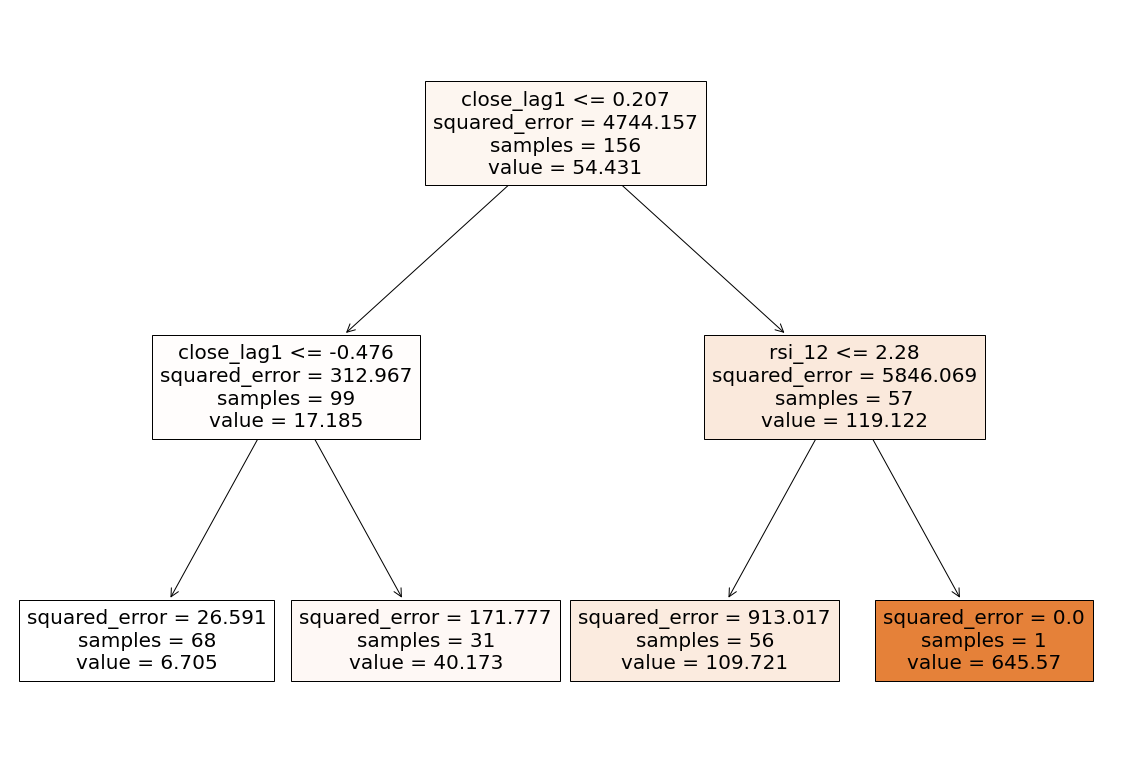

In [13]:
train_and_plot_tree(X_train, Y_train, X_test, Y_test, max_depth = 2)



**Training with max depth 3**

R Squared on train data:  0.9734446494183121
R Squared on test data:  0.8549438035490431


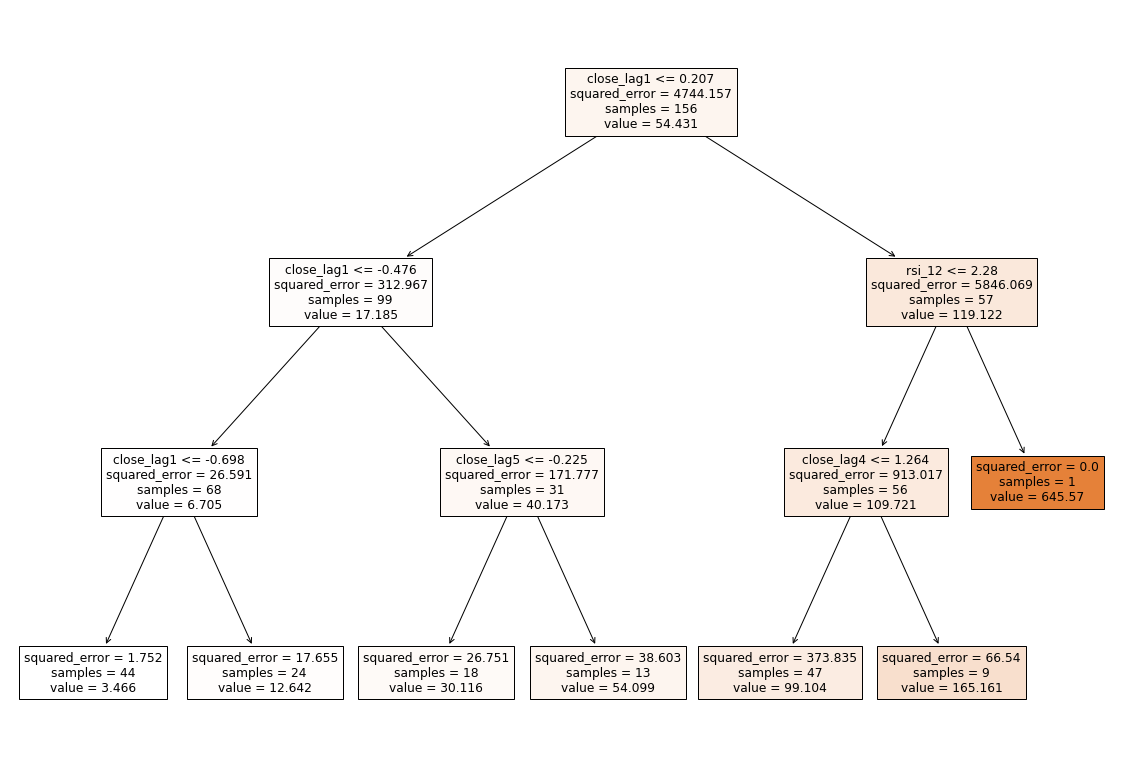

In [14]:
train_and_plot_tree(X_train, Y_train, X_test, Y_test, max_depth = 3)

**Training with max depth 4**

R Squared on train data:  0.9916878853577327
R Squared on test data:  0.9223059357688016


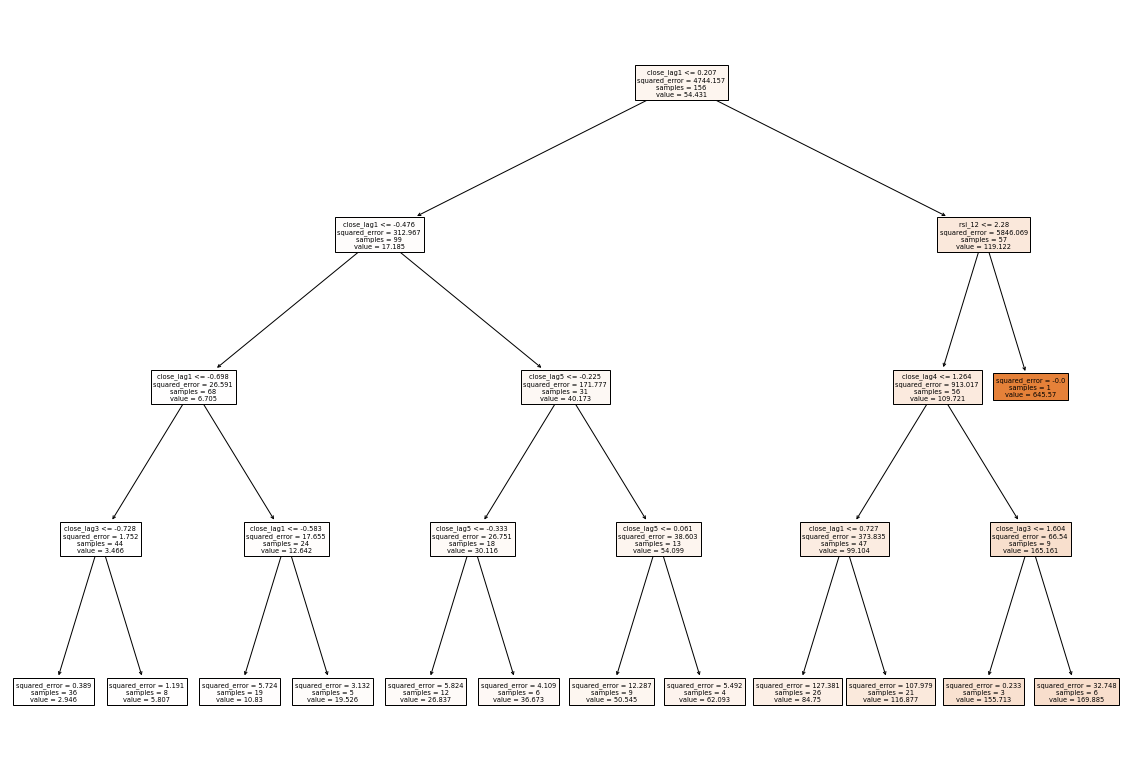

In [15]:
train_and_plot_tree(X_train, Y_train, X_test, Y_test, max_depth = 4)


# **Random Forrest Regression For Stock Prediction**

In [16]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=100,oob_score=True,max_features='sqrt')
rfr.fit(X_train, Y_train)

RandomForestRegressor(max_features='sqrt', oob_score=True, random_state=100)

In [20]:
y_rfr_pred = rfr.predict(X_test)
print("Train r2 score", r2_score(Y_train, rfr.predict(X_train)))

print("Test r2 score", r2_score(Y_test, y_rfr_pred))


Train r2 score 0.9263168701430624
Test r2 score 0.9927000112307877


In [22]:
import numpy as np

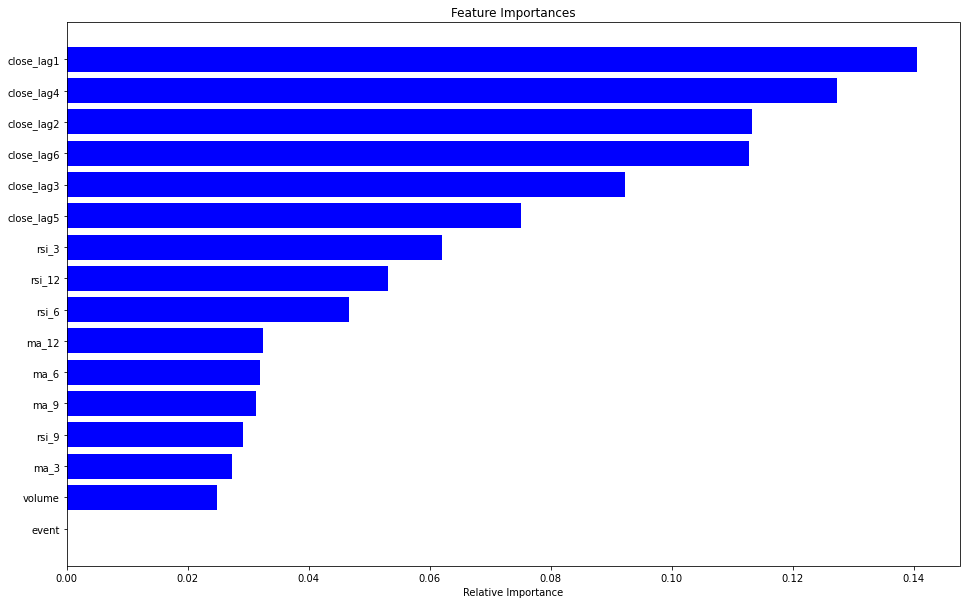

In [23]:
features = X_train.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(16,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [26]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, Y_train)

[09:59:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [28]:
y_xgr_pred = xgr.predict(X_test)
print("Train r2 score", r2_score(Y_train, xgr.predict(X_train)))

print("Test r2 score", r2_score(Y_test, y_xgr_pred))

Train r2 score 0.9997840532385108
Test r2 score 0.9852680050801396
